# Weather in Honolulu, Hawaii

In [1]:
#Add dependencies
%matplotlib inline
from matplotlib import figure, style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar
from scipy import stats, mean

## _Reflect Tables into SQLAlchemy ORM (Object Relational Mapper)_

In [2]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, asc , desc, and_

In [3]:
#SQL Use Tool
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [4]:
#Reflect database into new model
Base = automap_base()

#Reflect the tables and pass in the engine
Base.prepare(engine, reflect=True)

In [5]:
#Find classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [6]:
#Label tables from classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
#Create a session and bind it to the engine
session = Session(engine)

In [8]:
#Start an inspect of engine to obtain data information
inspector = inspect(engine)

In [9]:
#List column names and types for class Station
data = inspector.get_columns('Station')
for stations in data:
    print(stations['name'], stations['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
#List column names and types for class Measurement
info = inspector.get_columns('Measurement')
for measures in info:
    print(measures['name'], measures['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## Exploratory Climate Analysis

### _Most Recent 12 months of Precipitation Data_

In [11]:
#Find the most recent date
recent = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent

('2017-08-23')

In [12]:
#Make most recent date a variable
date_parts = [int(date_part) for date_part in recent[0].split("-")]
date_parts

[2017, 8, 23]

In [13]:
#Find the date from 1 year/12 months/365 days ago
year = datetime.date(*date_parts) - datetime.timedelta(days=365)
#print("Query Date: ", year)
year

datetime.date(2016, 8, 23)

In [14]:
#Find all dates and prcp within last 12 months
results = (session
           .query(Measurement.date,Measurement.prcp)
           .filter(Measurement.date >= year, Measurement.prcp != None)
           .all())
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

In [15]:
#App.py prcp: Find all dates and prcp within last 12 months
results_query = (session
                 .query(Measurement.date,func.avg(Measurement.prcp))
                 .filter(Measurement.date >= year, Measurement.prcp != None)
                 .group_by(Measurement.date)
                 .all())
results_query

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [16]:
#Place query results into a pandas dataframe by date
precipitation = pd.DataFrame(results,columns=['Date', 'Precipitation'])
shape = precipitation.set_index('Date')
organize = shape.sort_values(by ='Date')
organize

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


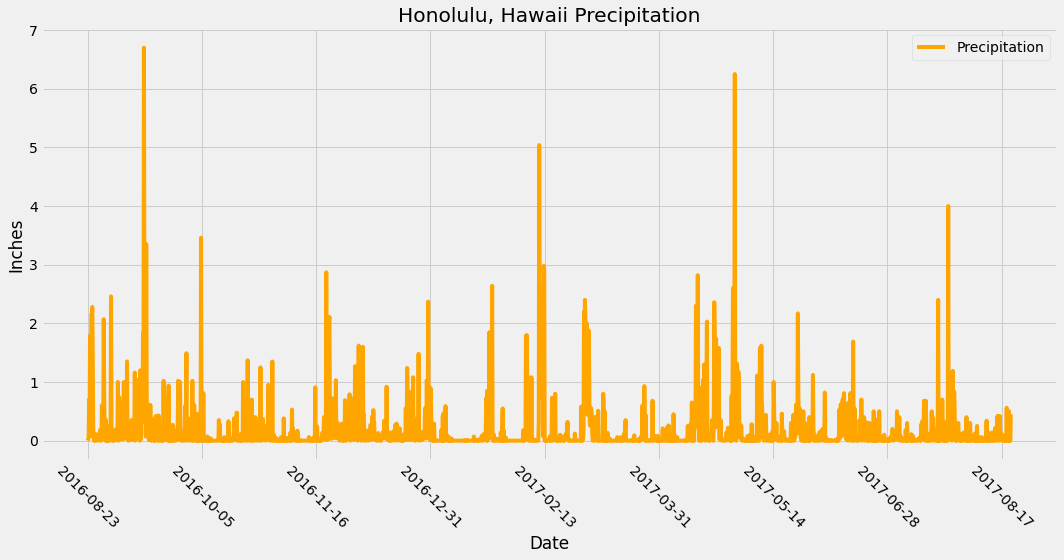

In [60]:
#Plot the precipitation date
organize.plot(figsize=(15,8), color='orange')
plt.title('Honolulu, Hawaii Precipitation')
plt.ylabel('Inches')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = -45)
plt.tight_layout()
plt.savefig('plots/All_Precipitation_Year_Plot.png')

In [18]:
#Find summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### _Station Analysis_


In [19]:
#Count the number of stations within the dataset
locations = session.query(Measurement.station).distinct().count()
locations

9

In [20]:
#App.py station (option 1): List of station ids in station
locations_ = session.query(Measurement.station).distinct().all()
locations_

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
#App.py station (option 2): List of station ids in station
locations_list = session.query(Station.station).all()
locations_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [22]:
#App.py station (option 2): Unravel results from id array to list
id_list = np.ravel(locations_list, order='K')  
id_list

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype='<U11')

In [23]:
#List the stations based on frequency in dataset
activity = (session
            .query(Measurement.station,
                   func.count(Measurement.station))
            .group_by(Measurement.station)
            .order_by(func.count(Measurement.station).desc())
            .all())
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
#Find the most active station based on frequency in dataset
most = (session
        .query(Measurement.station,
               func.count(Measurement.station))
        .group_by(Measurement.station)
        .order_by(func.count(Measurement.station).desc())
        .first())    
most

('USC00519281', 2772)

In [25]:
#Grab most active station id
most_station = most[0]
most_station

'USC00519281'

In [26]:
#Find station name (Currently based on station id USC00519281)
most_name = session.query(Station.name).filter(Station.station == most_station).all()
#print(str(most_name))
most_name

[('WAIHEE 837.5, HI US')]

In [27]:
#Grab most active station name
name = most_name[0][0]
name

'WAIHEE 837.5, HI US'

In [28]:
#Find the lowest temp, highest temp, and average temp for most active station (Currently USC00519281)
temperature = (session
               .query(func.min(Measurement.tobs),
                      func.max(Measurement.tobs),
                      func.avg(Measurement.tobs))
               .filter(Measurement.station == most_station)
               .order_by(func.min(Measurement.tobs))
               .all())
temperature

[(54.0, 85.0, 71.66378066378067)]

In [29]:
#Find all temperatures from within the last 12 months at the most active station (Currently USC00519281)
active = session.query(Measurement.tobs)\
        .filter(Measurement.date >= year, Measurement.station == most_station)\
        .order_by(Measurement.tobs).all()
active

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [30]:
#Place temperature observation data in a dataframe
observations = pd.DataFrame(active, columns=['Tobs'])
observations.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


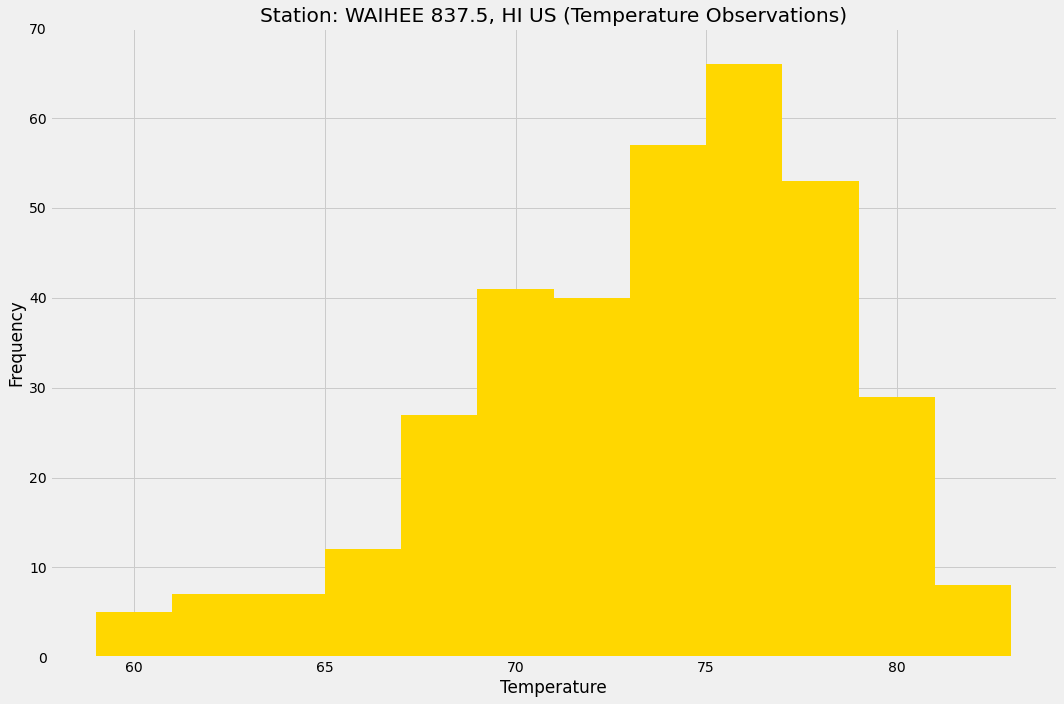

In [61]:
#Plot station temperature observations into a Histogram
plt.subplots(figsize=(15,10))
plt.hist(observations, bins= 12, color= 'gold')
plt.ylim(0,70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Station: {name} (Temperature Observations)')
plt.tight_layout()
plt.savefig('plots/MostActiveStation_Temperature_Histogram.png')

## Further Analysis

### _Temperature Analysis I_

In [32]:
#Find and return temperature averages of all temperatures by station for comparison
by_station = session.query(Measurement.station,func.avg(Measurement.tobs))\
            .group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
by_station

[('USC00514830', 74.8732970027248),
 ('USC00517948', 74.68440233236151),
 ('USC00519397', 74.55323054331865),
 ('USC00519523', 74.5436493068565),
 ('USC00518838', 72.72407045009784),
 ('USC00513117', 72.68918420081211),
 ('USC00519281', 71.66378066378067),
 ('USC00511918', 71.61596766043456),
 ('USC00516128', 70.91500765696784)]

In [33]:
#Find and return temperature average for all temperatures by station with a month filter
def station_average (month):
    
    return (session.query(Measurement.station,func.avg(Measurement.tobs))
                    .filter(func.strftime("%m", Measurement.date)== month)
                    .group_by(Measurement.station)
                    .order_by(func.avg(Measurement.tobs).desc()).all())

In [34]:
#Find and return temperature averages of all temperatures in June by station
june = station_average("06")
#print(station_average("06"))
june

[('USC00519397', 77.55932203389831),
 ('USC00519523', 76.66810344827586),
 ('USC00517948', 76.6554054054054),
 ('USC00514830', 76.00537634408602),
 ('USC00511918', 74.13939393939394),
 ('USC00513117', 74.05084745762711),
 ('USC00518838', 73.39473684210526),
 ('USC00519281', 73.27118644067797),
 ('USC00516128', 71.9372197309417)]

In [35]:
#Find and return temperature averages of all temperatures in December by station
december = station_average("12")
#print(station_average("12"))
december

[('USC00514830', 73.2247191011236),
 ('USC00519523', 72.43333333333334),
 ('USC00518838', 72.42105263157895),
 ('USC00517948', 71.8348623853211),
 ('USC00519397', 71.10952380952381),
 ('USC00513117', 71.06944444444444),
 ('USC00519281', 69.90322580645162),
 ('USC00511918', 69.6842105263158),
 ('USC00516128', 69.29126213592232)]

In [36]:
#Grab all temperature averages of stations with a dataset filter
def all_averages (all_month):

    average_month = []

    for index, tuple in enumerate(all_month):
        average_month.append(tuple[1])
    
    return average_month

In [37]:
#Grab all temperature averages of stations for June data 
june_avg = all_averages(june)
june_avg

[77.55932203389831,
 76.66810344827586,
 76.6554054054054,
 76.00537634408602,
 74.13939393939394,
 74.05084745762711,
 73.39473684210526,
 73.27118644067797,
 71.9372197309417]

In [38]:
#Grab all temperature averages of stations for December data 
december_avg = all_averages(december)
december_avg

[73.2247191011236,
 72.43333333333334,
 72.42105263157895,
 71.8348623853211,
 71.10952380952381,
 71.06944444444444,
 69.90322580645162,
 69.6842105263158,
 69.29126213592232]

In [39]:
#Unpaired (independent) t-test
stats.ttest_ind(december_avg, june_avg)

Ttest_indResult(statistic=-4.615865424404701, pvalue=0.00028626292761018595)

In [40]:
#Paired (relative) t-test
stats.ttest_rel(december_avg, june_avg)

Ttest_relResult(statistic=-17.003165938723054, pvalue=1.4530971041972015e-07)

#### The paired t-test is correct because both the June and December datasets have an equal number of data points and each is matched by station ids in both month datasets.

#### The pvalue of 1.4530971041972015e-07 is statistically significant, because is it greater than 0.05.

### _Temperature Analysis II_

In [41]:
#Find and return the minimum, average, and maximum temperatures for date range
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

In [42]:
#Results for date range test
starter = (calc_temps('2012-02-28', '2012-03-05'))
#print(calc_temps('2012-02-28', '2012-03-05'))
starter

[(62.0, 69.57142857142857, 74.0)]

In [43]:
#Results for actual date range
all_year = (calc_temps('2016-08-23', '2017-08-23'))
#print(calc_temps('2016-08-23', '2017-08-23'))
all_year

[(58.0, 74.59058295964125, 87.0)]

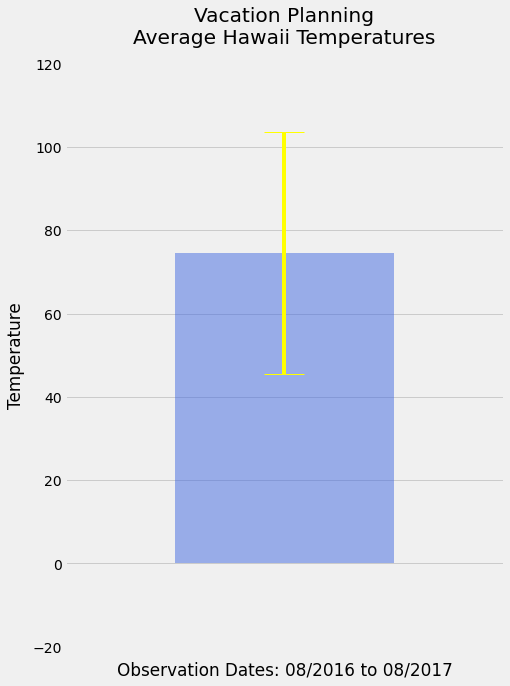

In [62]:
#Plot min, avg, and max temperature for most recent year temperature data by using max-min for y error bar (YERR)
hawaii = pd.DataFrame(all_year, columns=['Min Temp','Avg Temp','Max Temp'])
vacayplan_avg = hawaii['Avg Temp']
avg_range = hawaii.iloc[0]['Max Temp'] - hawaii.iloc[0]['Min Temp']
vacayplan_avg.plot(kind= 'bar',yerr=avg_range, figsize=(7,10),
                   alpha = 0.5,
                   color='royalblue',
                   ecolor="yellow",
                   capsize=20)
plt.ylim(-20,120)
plt.xticks([])
plt.title("Vacation Planning\nAverage Hawaii Temperatures", pad=20)
plt.ylabel("Temperature", labelpad=7)
plt.xlabel("Observation Dates: 08/2016 to 08/2017", labelpad = 14)
#plt.grid(True)
plt.savefig("plots/All_Temperature_Summary_ErrorBar.png")

#### _Formatted for with specific variables using errorbar: peak-to-peak (tmax-tmin) value as the y error bar (yerr)_

In [45]:
#Grab min, average, max
tmin = all_year[0][0]
final_avg = all_year[0][1]
tmax = all_year[0][2]
peak_to_peak = (tmax-tmin)

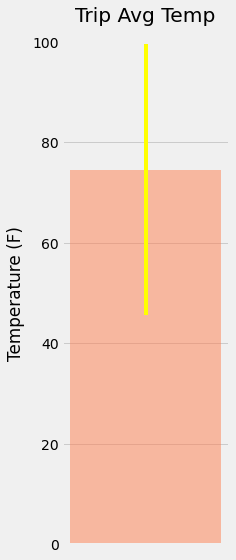

In [63]:
#Plot min, avg, and max temperature with specific format
plt.figure(figsize=(3.5,8))
plt.bar(1, final_avg, color = 'coral', alpha = 0.5)
plt.errorbar(1, final_avg, yerr= (peak_to_peak),color = 'yellow')
plt.ylim(0, 100)
plt.xticks([])
plt.title('Trip Avg Temp', pad=20)
plt.ylabel("Temperature (F)", labelpad=7)
plt.tight_layout()
plt.savefig("plots/All_Temperature_Formatted_ErrorBar.png")

#### _Daily Rainfall Average_

In [47]:
#Find and return total prcp/rainfall by station for trip dates with station name, latitude, longitude, and elevation
def prcp_total (trip_start, trip_end):

    return (session.query(Measurement.station,func.sum(Measurement.prcp),
                         Station.name,Station.latitude, Station.longitude, Station.elevation)
                .filter(Measurement.station == Station.station)        
                .filter(Measurement.date >= trip_start)
                .filter(Measurement.date <= trip_end)
                .group_by(Measurement.station,Station.name,Station.latitude, Station.longitude, Station.elevation)
                .order_by(func.sum(Measurement.prcp).desc()).all())

In [48]:
#Results for trip dates
prcp_stations = (prcp_total('2016-08-28', '2016-09-03'))

In [49]:
#Unravel results from id array to list
prcpstations_list = np.ravel(prcp_stations, order='K')
prcpstations_list

array(['USC00516128', '6.52', 'MANOA LYON ARBO 785.2, HI US', '21.3331',
       '-157.8025', '152.4', 'USC00519281', '1.3399999999999999',
       'WAIHEE 837.5, HI US', '21.45167', '-157.84888999999998', '32.9',
       'USC00513117', '0.5', 'KANEOHE 838.1, HI US', '21.4234',
       '-157.8015', '14.6', 'USC00519523', '0.47000000000000003',
       'WAIMANALO EXPERIMENTAL FARM, HI US', '21.33556', '-157.71139',
       '19.5', 'USC00514830', '0.37',
       'KUALOA RANCH HEADQUARTERS 886.9, HI US', '21.5213', '-157.8374',
       '7.0', 'USC00519397', '0.14', 'WAIKIKI 717.2, HI US', '21.2716',
       '-157.8168', '3.0', 'USC00517948', '0.02', 'PEARL CITY, HI US',
       '21.3934', '-157.9751', '11.9'], dtype='<U38')

In [50]:
#Format trip dates rainfall data into a dataframe
trip = pd.DataFrame(prcp_stations, columns=['Station ID','Total Rainfall','Name','Latitude','Longitude','Elevation'])
trip

,Station ID,Total Rainfall,Name,Latitude,Longitude,Elevation
0,USC00516128,6.52,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,1.34,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,0.50,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,0.47,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,0.37,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,0.14,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,0.02,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [51]:
#Find and calculate daily normals of temperature minimum, average, and maximum
def daily_normals(vacay):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == vacay)
                   .all())

In [52]:
#Results for date test
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [53]:
#Create a list of days in vacation trip dates plan
start_day = datetime.datetime.strptime("08-28", "%m-%d")
end_day = datetime.datetime.strptime("09-03", "%m-%d")
trip_plan = [start_day + datetime.timedelta(days=x) for x in range(0, (end_day-start_day).days+1)]

trip_dates = []

for date in trip_plan:
    trip_dates.append(date.strftime("%m-%d"))

trip_dates

['08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03']

In [54]:
#Loop trip dates through daily normals calculation
normals = []

for vacay in trip_dates:
    normals.append(daily_normals(vacay))  

normals

[[(67.0, 76.73469387755102, 86.0)],
 [(70.0, 76.23529411764706, 85.0)],
 [(68.0, 76.41666666666667, 84.0)],
 [(67.0, 76.84, 85.0)],
 [(69.0, 77.0, 82.0)],
 [(67.0, 76.66666666666667, 83.0)],
 [(69.0, 76.13725490196079, 83.0)]]

In [55]:
#Pull list out of list in preparation for dataframe
normals2 = [x[0] for x in normals]

In [56]:
#Format trip rainfall data into a dataframe
normals_all = pd.DataFrame(normals2, columns=['Min', 'Average', 'Max'])

In [57]:
#Format trip dates into a dataframe
normal_dates = pd.DataFrame(trip_dates, columns=['date'])

In [58]:
#Format trip dates and rainfall data into a dataframe
combined = pd.concat([normal_dates, normals_all], axis = 1)
final = combined.set_index('date')
final

,Min,Average,Max
date,,,
08-28,67.0,76.734694,86.0
08-29,70.0,76.235294,85.0
08-30,68.0,76.416667,84.0
08-31,67.0,76.840000,85.0
09-01,69.0,77.000000,82.0
09-02,67.0,76.666667,83.0
09-03,69.0,76.137255,83.0


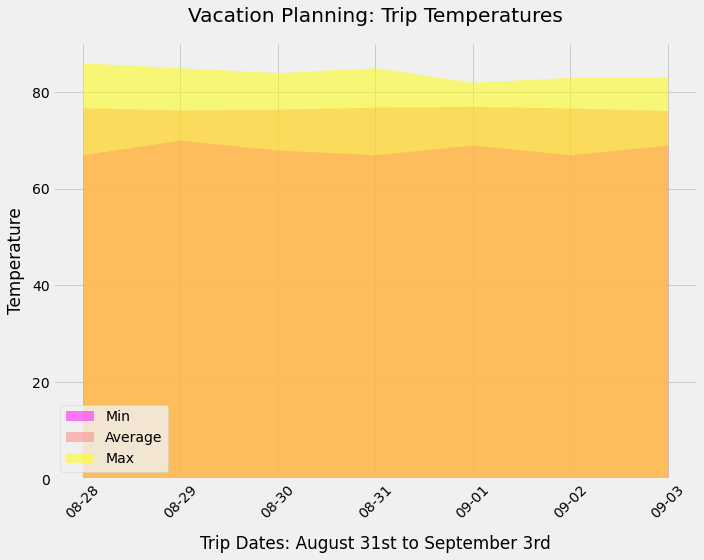

In [64]:
#Plot the temperature minimum, average, and maximum for trip dates  
trip_summary = final.plot(kind='area', figsize=(10,8), stacked=False, linewidth=0, colormap="spring")
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.title("Vacation Planning: Trip Temperatures", pad=20)
plt.ylabel("Temperature", labelpad=7)
plt.xlabel("Trip Dates: August 31st to September 3rd", labelpad = 14)
plt.tight_layout()
plt.savefig("plots/TripDates_Temperature_AreaPlot.png")